In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud
from nltk.corpus import wordnet
from nltk import word_tokenize
nltk.download("averaged_perceptron_tagger")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
def get_wordnet_pos(treebank_tag):
  if treebank_tag.startswith('J'):
    return wordnet.ADJ
  elif treebank_tag.startswith('V'):
    return wordnet.VERB
  elif treebank_tag.startswith('N'):
    return wordnet.NOUN
  elif treebank_tag.startswith('R'):
    return wordnet.ADV
  else:
    return wordnet.NOUN

In [ ]:
df = pd.read_csv('AirlineTweets.csv')

In [ ]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
x=df["text"]
y=df["airline_sentiment"]

In [ ]:
y=y.replace("positive",1)
y=y.replace("negative",0)
y=y.replace("neutral",2)

In [ ]:
y

0        2
1        1
2        2
3        0
4        0
        ..
14635    1
14636    0
14637    2
14638    0
14639    2
Name: airline_sentiment, Length: 14640, dtype: int64

In [ ]:
def clean(text):
  return " ".join([word for word in text.split(" ") if not word.startswith("@")])

In [ ]:
x=x.apply(clean)

In [ ]:
x

0                                               What said.
1        plus you've added commercials to the experienc...
2        I didn't today... Must mean I need to take ano...
3        it's really aggressive to blast obnoxious "ent...
4                 and it's a really big bad thing about it
                               ...                        
14635    thank you we got on a different flight to Chic...
14636    leaving over 20 minutes Late Flight. No warnin...
14637      Please bring American Airlines to #BlackBerry10
14638    you have my money, you change my flight, and d...
14639    we have 8 ppl so we need 2 know how many seats...
Name: text, Length: 14640, dtype: object

In [ ]:
class LemmaTokenizer:
  def __init__(self):
    self.wnl = WordNetLemmatizer()
  def __call__(self, doc):
    tokens = word_tokenize(doc)
    words_and_tags = nltk.pos_tag(tokens)
    return [self.wnl.lemmatize(word, pos=get_wordnet_pos(tag)) \
            for word, tag in words_and_tags]

In [ ]:
vectorizer=TfidfVectorizer(lowercase=True, stop_words="english", tokenizer=LemmaTokenizer(),max_features=2000)

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=2,test_size=0.3)

<Axes: >

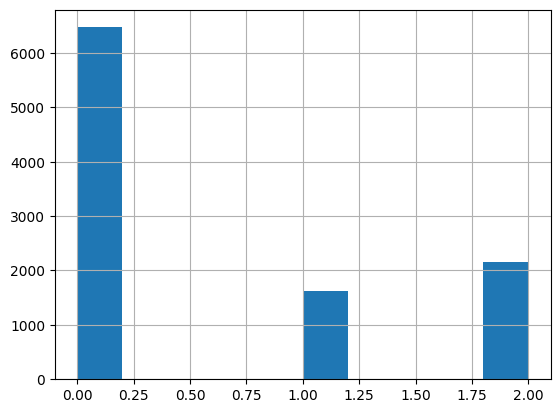

In [ ]:
ytrain.hist()

In [ ]:
xtrain=vectorizer.fit_transform(xtrain)
xtest=vectorizer.transform(xtest)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['far', 'make', 'u'] not in stop_words.
  warnings.warn(


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model=LogisticRegression(max_iter=500)

<Axes: >

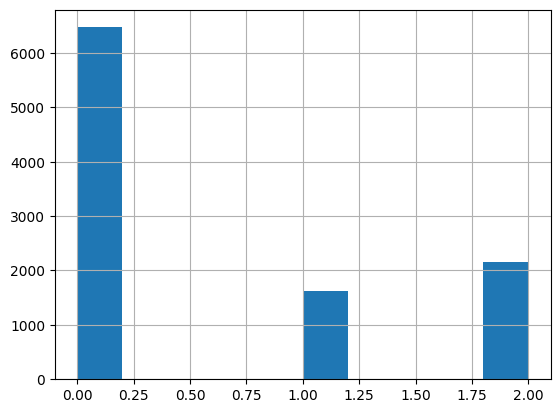

In [ ]:
ytrain.hist()

In [ ]:
sampling_strategy = {
    2: 3000,  # Oversample class 0 to have 1000 samples
    1: 3000   # Oversample class 2 to have 500 samples
}

In [ ]:
from imblearn.over_sampling import SMOTE

# ... (Load your data X and labels y)

# Define an SMOTE object with sample_size
smote = SMOTE(random_state=42, sampling_strategy=sampling_strategy)

# Oversample the minority class
Xresampled, yresampled = smote.fit_resample(xtrain,ytrain)

<Axes: >

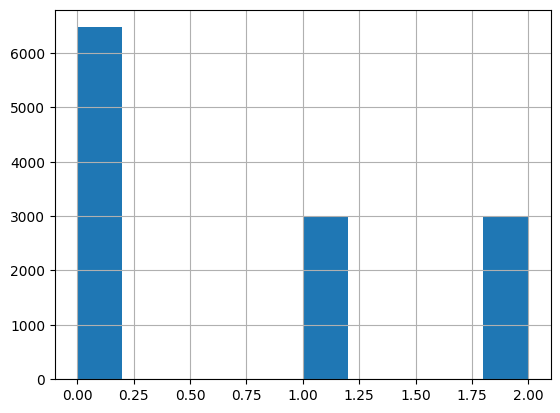

In [ ]:
yresampled.hist()

In [ ]:
model.fit(Xresampled, yresampled)

LogisticRegression(max_iter=500)

In [ ]:
model.score(xtrain,ytrain)

0.8547033567525371

In [ ]:
model.score(xtest,ytest)

0.7889344262295082

In [ ]:
dfb=df[df["airline_sentiment"]!= "neutral"]

In [ ]:
x=dfb["text"]
y=dfb["airline_sentiment"]

In [ ]:
y=y.replace("positive",1)
y=y.replace("negative",0)
y

1        1
3        0
4        0
5        0
6        1
        ..
14633    0
14634    0
14635    1
14636    0
14638    0
Name: airline_sentiment, Length: 11541, dtype: int64

In [ ]:
x=x.apply(clean)

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=2,test_size=0.3)

<Axes: >

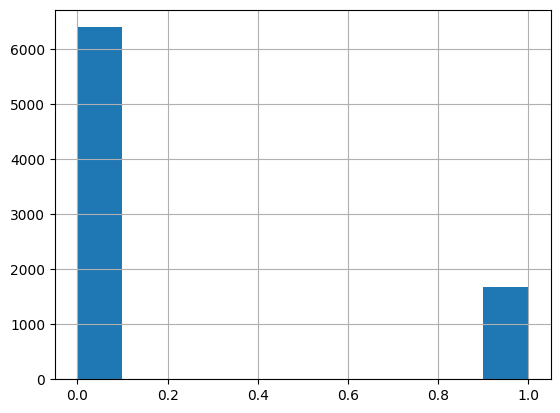

In [ ]:
ytrain.hist()

In [ ]:
xtrain=vectorizer.fit_transform(xtrain)
xtest=vectorizer.transform(xtest)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
smote = SMOTE(random_state=42, sampling_strategy=0.5)

# Oversample the minority class
Xresampled, yresampled = smote.fit_resample(xtrain,ytrain)

<Axes: >

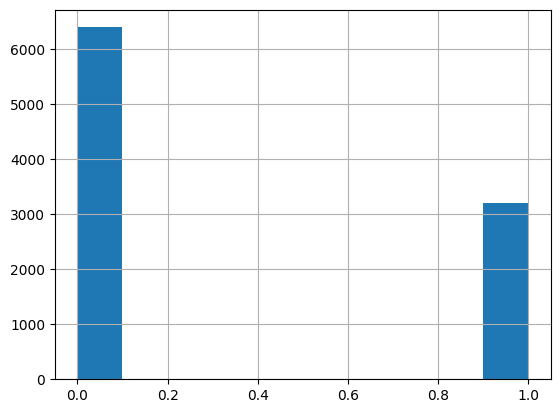

In [ ]:
yresampled.hist()

In [ ]:
model.fit(Xresampled, yresampled)

LogisticRegression(max_iter=500)

In [ ]:
model.score(xtrain,ytrain)

0.9403317652884378

In [ ]:
model.score(xtest,ytest)

0.9197227837135432

In [ ]:
word_index_map = vectorizer.vocabulary_
word_index_map

In [ ]:
# let's look at the weights for each word
# try it with different threshold values!
threshold = 2

print("Most positive words:")
for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight > threshold:
        print(word, weight)

In [ ]:
print("Most negative words:")
for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight < -threshold:
        print(word, weight)